# SK_6.3. Geographic Visualization

## This script contains the following:
### 1. Import data and libraries
### 2. Data wrangling
### 3. Data cleaning
### 4. Plotting a choropleth

## 1. Import data and libraries

In [1]:
# Import data and libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import os
import folium
import json

In [2]:
# This command propts matplotlib visuals to appear in the notebook

%matplotlib inline

In [3]:
# Import ".json" file for the UK

uk_geo = r'C:\Users\Asus\OneDrive\Documents\Data Analytics\Data Immersion\6. Advanced Analytics and Dashboard Design\Search and rescue helicopter\02 Data\Prepared Data\uk_regions.json'

In [4]:
# Check .json file

uk_geo

'C:\\Users\\Asus\\OneDrive\\Documents\\Data Analytics\\Data Immersion\\6. Advanced Analytics and Dashboard Design\\Search and rescue helicopter\\02 Data\\Prepared Data\\uk_regions.json'

In [5]:
# That's just in case you want to look at the JSON file contents here too:

f = open(r'C:\Users\Asus\OneDrive\Documents\Data Analytics\Data Immersion\6. Advanced Analytics and Dashboard Design\Search and rescue helicopter\02 Data\Prepared Data\uk_regions.json',)
  
# returns JSON object asa dictionary
data = json.load(f)
  
# Iterating through the json list
for i in data['features']:
    print(i)
    

{'type': 'Feature', 'geometry': {'type': 'MultiPolygon', 'coordinates': [[[[-2.03, 55.77], [-2.02, 55.77], [-2.03, 55.77], [-2.04, 55.76], [-2.05, 55.76], [-2.07, 55.76], [-2.09, 55.76], [-2.24, 55.65], [-2.33, 55.63], [-2.31, 55.62], [-2.23, 55.52], [-2.2, 55.48], [-2.18, 55.47], [-2.33, 55.41], [-2.34, 55.39], [-2.33, 55.39], [-2.34, 55.39], [-2.33, 55.39], [-2.34, 55.37], [-2.64, 55.26], [-2.63, 55.25], [-2.63, 55.23], [-2.69, 55.19], [-2.53, 55.08], [-2.53, 55.09], [-2.53, 55.08], [-2.53, 55.09], [-2.52, 55.09], [-2.5, 55.09], [-2.49, 55.09], [-2.5, 55.09], [-2.49, 55.09], [-2.5, 55.07], [-2.51, 55.04], [-2.51, 55.03], [-2.51, 55.04], [-2.51, 55.03], [-2.6, 54.97], [-2.6, 54.96], [-2.6, 54.97], [-2.6, 54.96], [-2.41, 54.85], [-2.33, 54.81], [-2.33, 54.8], [-2.33, 54.81], [-2.33, 54.8], [-2.33, 54.81], [-2.33, 54.8], [-2.34, 54.71], [-2.35, 54.7], [-2.16, 54.46], [-2.17, 54.46], [-2.16, 54.46], [-1.79, 54.49], [-1.66, 54.53], [-1.64, 54.52], [-1.59, 54.51], [-1.58, 54.51], [-1.59, 5

In [6]:
# Creating a path

path = r'C:\Users\Asus\OneDrive\Documents\Data Analytics\Data Immersion\6. Advanced Analytics and Dashboard Design\Search and rescue helicopter'

In [7]:
# Check path

path

'C:\\Users\\Asus\\OneDrive\\Documents\\Data Analytics\\Data Immersion\\6. Advanced Analytics and Dashboard Design\\Search and rescue helicopter'

In [8]:
# Import the sarh0112_cleaned data

df_sarh0112 = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'sarh0112_cleaned.csv'))

In [9]:
# Check first 5 rows of sarh0112

df_sarh0112.head()

,Date,Day_of_week,Name_of_the_Base,Type_of_tasking,Tasking_location,Tasking_outcome,Region,Latitude,Longitude,Time_of_day,Tasking_duration
0,01/04/2015,Wednesday,Sumburgh,Rescue/Recovery,Maritime,Completed,Highlands and Islands,61.47,1.53,6.00pm - 8.59pm,2
1,01/04/2015,Wednesday,Sumburgh,Rescue/Recovery,Land,Completed,Highlands and Islands,59.25,-2.58,6.00am - 8.59am,2
2,01/04/2015,Wednesday,Inverness,Support,Land,Completed,Highlands and Islands,56.79,-4.99,9.00am - 11.59am,3
3,01/04/2015,Wednesday,Inverness,Support,Land,Completed,Highlands and Islands,56.79,-5.06,12.00pm - 2.59pm,4
4,02/04/2015,Thursday,Inverness,Rescue/Recovery,Land,Completed,Highlands and Islands,56.81,-5.02,6.00pm - 8.59pm,1


In [10]:
# Check dimension of sarh0112

df_sarh0112.shape

(19217, 11)

## 2. Data wrangling

In [11]:
# Merging 'latitude' and 'longitude' in one column

df_sarh0112['coordinates'] = list(zip(df_sarh0112.Latitude, df_sarh0112.Longitude))

In [12]:
# Check new column

df_sarh0112.head()

,Date,Day_of_week,Name_of_the_Base,Type_of_tasking,Tasking_location,Tasking_outcome,Region,Latitude,Longitude,Time_of_day,Tasking_duration,coordinates
0,01/04/2015,Wednesday,Sumburgh,Rescue/Recovery,Maritime,Completed,Highlands and Islands,61.47,1.53,6.00pm - 8.59pm,2,"(61.47, 1.53)"
1,01/04/2015,Wednesday,Sumburgh,Rescue/Recovery,Land,Completed,Highlands and Islands,59.25,-2.58,6.00am - 8.59am,2,"(59.25, -2.58)"
2,01/04/2015,Wednesday,Inverness,Support,Land,Completed,Highlands and Islands,56.79,-4.99,9.00am - 11.59am,3,"(56.79, -4.99)"
3,01/04/2015,Wednesday,Inverness,Support,Land,Completed,Highlands and Islands,56.79,-5.06,12.00pm - 2.59pm,4,"(56.79, -5.06)"
4,02/04/2015,Thursday,Inverness,Rescue/Recovery,Land,Completed,Highlands and Islands,56.81,-5.02,6.00pm - 8.59pm,1,"(56.81, -5.02)"


In [13]:
# Select only the necessary columns and put them in a list called columns

columns = ['Region', 'Tasking_duration']

In [14]:
# Create a subset

uk_area = df_sarh0112[columns]

In [15]:
# Check first 5 rows of a subset

uk_area.head()

,Region,Tasking_duration
0,Highlands and Islands,2
1,Highlands and Islands,2
2,Highlands and Islands,3
3,Highlands and Islands,4
4,Highlands and Islands,1


In [16]:
# Check the new column 'coordinates'

uk_area.head()

,Region,Tasking_duration
0,Highlands and Islands,2
1,Highlands and Islands,2
2,Highlands and Islands,3
3,Highlands and Islands,4
4,Highlands and Islands,1


## 3. Conduct consistency check

### Check for missing values

In [17]:
# Check for missing values

uk_area.isnull().sum()

Region              0
Tasking_duration    0
dtype: int64

#### No missing values

### Duplicates check

In [18]:
# Check for duplicates

dups = uk_area.duplicated()

In [19]:
# no dups

dups.shape 

(19217,)

### Extreme values check

<Axes: xlabel='Tasking_duration', ylabel='Count'>

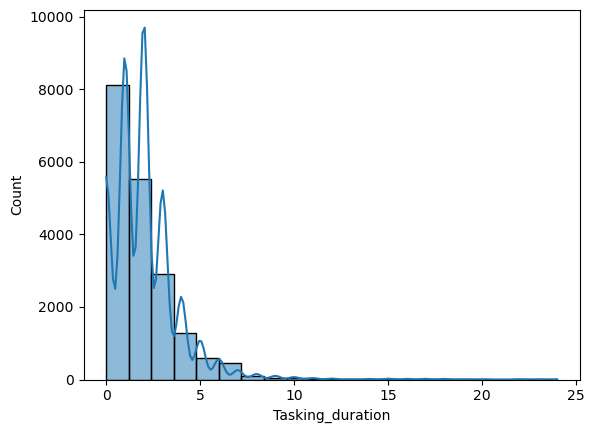

In [20]:
# Extreme values check with histogram

sns.histplot(uk_area['Tasking_duration'], bins=20, kde=True) # Shows extreme value for "Tasking_duration"

In [21]:
# Check type of data

uk_area.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19217 entries, 0 to 19216
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Region            19217 non-null  object
 1   Tasking_duration  19217 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 300.4+ KB


In [22]:
# Check for mixed types

for col in uk_area.columns.tolist():
    weird = (uk_area[[col]].applymap(type) != uk_area[[col]].iloc[0].apply(type)).any(axis = 1)
    if len (uk_area[weird]) > 0:
        print (col)
    else:
        print ('No mixed dtypes', col)

No mixed dtypes Region
No mixed dtypes Tasking_duration


In [23]:
# Check for mixed types

for col in df_sarh0112.columns.tolist():
    weird = (df_sarh0112[[col]].applymap(type) != df_sarh0112[[col]].iloc[0].apply(type)).any(axis = 1)
    if len (df_sarh0112[weird]) > 0:
        print (col)
    else:
        print ('No mixed dtypes', col)

No mixed dtypes Date
No mixed dtypes Day_of_week
No mixed dtypes Name_of_the_Base
No mixed dtypes Type_of_tasking
No mixed dtypes Tasking_location
No mixed dtypes Tasking_outcome
No mixed dtypes Region
No mixed dtypes Latitude
No mixed dtypes Longitude
No mixed dtypes Time_of_day
No mixed dtypes Tasking_duration
No mixed dtypes coordinates


## 4. Plotting a choropleth

In [24]:
# Create a data frame with just the coordinates and the values for tasking duration we want plotted

data_to_plot = uk_area[['Region', 'Tasking_duration']]
data_to_plot.head()

,Region,Tasking_duration
0,Highlands and Islands,2
1,Highlands and Islands,2
2,Highlands and Islands,3
3,Highlands and Islands,4
4,Highlands and Islands,1


In [25]:
# Setup a folium map at a high-level zoom

map = folium.Map(location = [100, 0], zoom_start = 1.5)

# Choropleth maps bind Pandas Data Frames and json geometries. This allows us to quickly visualize data combinations

folium.Choropleth(
    geo_data = uk_geo,
    data = data_to_plot,
    columns = ['Region', 'Tasking_duration'],
    key_on = 'feature.properties.rgn19nm',
    fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "Tasking_duration").add_to(map)
folium.LayerControl().add_to(map)

map

### This choropleth compares each of the regions in the UK by the overall tasking duration. The darker the sahding, the longer the tasking duration. We can see from this choropleth that Scotland and Eastern (East of England) have the longest tasking durations.

### I am looking forward to investigating these regions more. Is the majority of bases  situated nearby so they can answer more calls compared to others?

In [26]:
# Saving the map

map.save('plot.data.html')